Load Packages

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("packages loaded")


packages loaded


Load Data

In [42]:
path='C:\\Users\\eprabanch\\Desktop\\Class\\Class\\Regression\\Multiple_Linear_Regression\\'
# Importing the dataset
dataset = pd.read_csv(path+'50_Startups.csv')
print("loaded Data")

loaded Data


Univariate Analysis

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,5.000000e+01,50.000000,50.000000
mean,73721.615600,2.739126e+08,211025.097800,112012.639200
std,45902.256482,1.935999e+09,122290.310726,40306.180338
min,0.000000,5.128314e+04,0.000000,14681.400000
25%,39936.370000,1.037309e+05,129300.132500,90138.902500
50%,73051.080000,1.226998e+05,212716.240000,107978.190000
75%,101602.800000,1.454169e+05,299469.085000,139765.977500
max,165349.200000,1.368970e+10,471784.100000,192261.830000


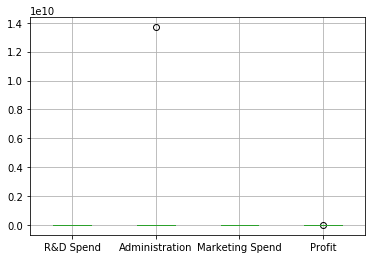

In [5]:
dataset.boxplot()

In [44]:
#Renaming columns
dataset.columns

dataset.columns = ['rd_spend', 'administration', 'marketing_spend', 'state', 'profit']

Text(0,0.5,'count')

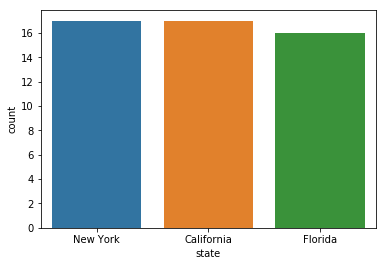

In [7]:
ax = sns.countplot(x='state', data=dataset)
ax.set_xlabel('state')
ax.set_ylabel("count")  


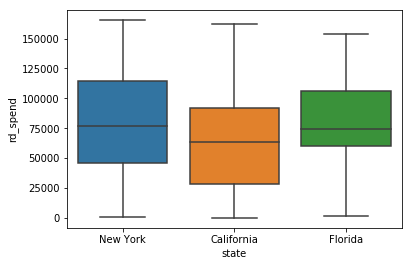

In [8]:
ax = sns.boxplot(x="state", y="rd_spend", data=dataset)

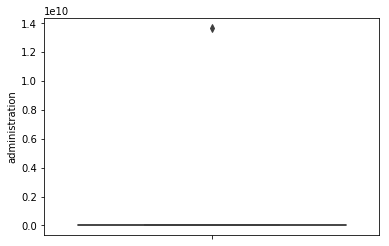

In [20]:
ax = sns.boxplot(y="administration", data=dataset)

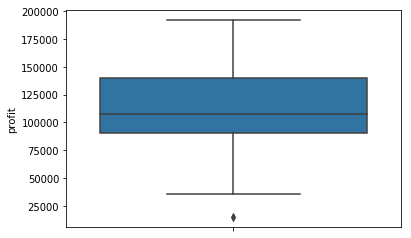

In [22]:
ax = sns.boxplot(y="profit", data=dataset)

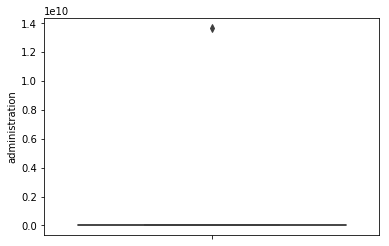

In [10]:
ax = sns.boxplot( y="administration", data=dataset)
######################################################

# Bivariate Analysis

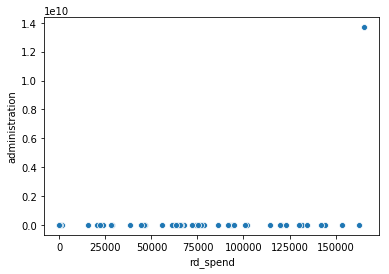

In [16]:
ax = sns.scatterplot(x="rd_spend", y="administration", data=dataset)

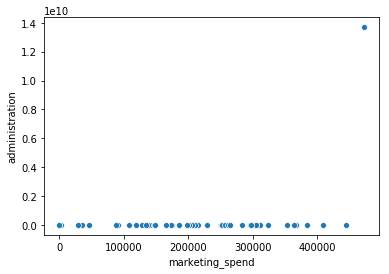

In [23]:
ax = sns.scatterplot(x="marketing_spend", y="administration", data=dataset)

# Correlation

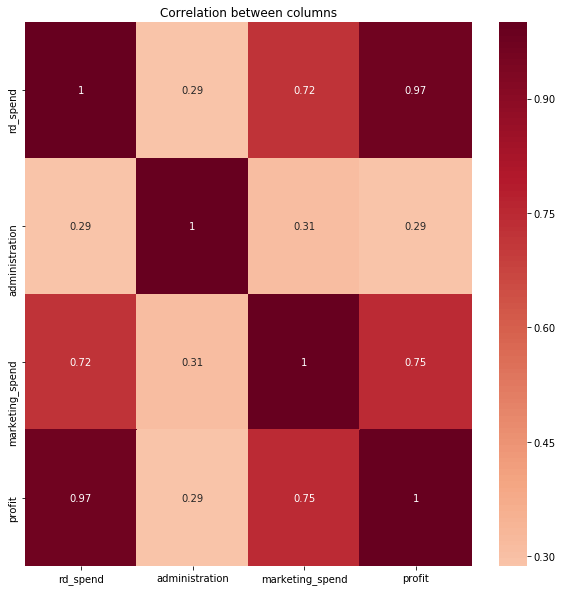

In [27]:

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between columns')
plt.show()

# Missing Value Treatement

In [11]:
##################Missing Value Treatement#############

#1. Deletion
# count the number of NaN values in each column
print(dataset.isnull().sum())

# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(dataset.shape)

rd_spend           0
administration     0
marketing_spend    0
state              0
profit             0
dtype: int64
(50, 5)


In [12]:
#2. Impute
# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of NaN values in each column
print(dataset.isnull().sum())

rd_spend           0
administration     0
marketing_spend    0
state              0
profit             0
dtype: int64


# Outlier Detection

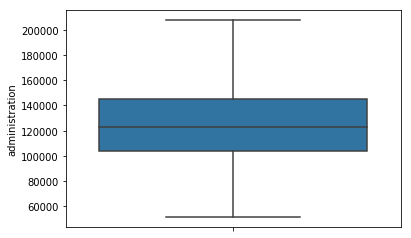

In [38]:
#################Outlier Detection ####################
ax = sns.boxplot( y="administration", data=dataset)

In [37]:
#OUtlier Imputation for administration column

q1, q3= np.percentile(dataset['administration'],[25,75])
q1, q3

iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

lower_bound,upper_bound


# # Replacing outlier in data with the upper bound value

dataset['administration'] = dataset['administration'].apply(lambda admin: upper_bound if (admin > upper_bound) else admin)


# Feature Transformations

In [45]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset['state'] = labelencoder.fit_transform(dataset['state'])

#One hot Encoding
ohe = pd.get_dummies(dataset['state'], prefix='state', drop_first=False)
ohe.columns
dataset= pd.concat([dataset, ohe], axis=1)
print(dataset.head())

    rd_spend  administration  marketing_spend  state     profit  state_0  \
0  165349.20    1.368970e+10        471784.10      2  192261.83        0   
1  162597.70    1.513776e+05        443898.53      0  191792.06        1   
2  153441.51    1.011456e+05        407934.54      1  191050.39        0   
3  144372.41    1.186719e+05        383199.62      2  182901.99        0   
4  142107.34    9.139177e+04        366168.42      1  166187.94        0   

   state_1  state_2  
0        0        1  
1        0        0  
2        1        0  
3        0        1  
4        1        0  


# Set Features \ target

In [46]:

features = ['rd_spend', 'administration','marketing_spend','state_0', 'state_1', 'state_2']
target = ['profit']
X = dataset[features]
y = dataset[target]
print ("features set")

features set


# Train split data

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("train test split done")

train test split done


# Model Building


In [49]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred


array([[101347.33325561],
       [133872.98213548],
       [133303.33198829],
       [ 72964.34288812],
       [179878.26315008],
       [115563.4107635 ],
       [ 69084.91792109],
       [ 97892.58384588],
       [113913.17654987],
       [169550.16884645]])

# Metrics

In [51]:
from sklearn import metrics

print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

Coefficients: 
 [[ 7.85302623e-01 -4.21869474e-08  3.41746201e-02  8.45892857e+01
  -7.56278151e+02  6.71688865e+02]]
Intercept: 
 [46195.51734296]
7117.811866702514
8409.340960214511
0.944704448936845
